In [1]:
# Basic
from datetime import datetime, timedelta
import time

# Data Analysis Specific
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse as date_parser
from geopy.geocoders import Nominatim

# Marchine Learning Specific
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

# IPython magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = './data/'
DETROIT_LAT = (42.252, 42.452)
DETROIT_LNG = (-83.295, -82.895)
SIZE_RATIO = 1000
DETROIT_WIDTH = 200
DETROIT_HEIGHT = 400
print DETROIT_WIDTH, DETROIT_HEIGHT, float(DETROIT_WIDTH)/DETROIT_HEIGHT

200 400 0.5


In [3]:
clean_permit = pd.read_csv('clean/permit.csv',index_col=0)
clean_violation = pd.read_csv('clean/violation.csv',index_col=0)
clean_crime = pd.read_csv('clean/crime.csv',index_col=0)
clean_311 = pd.read_csv('clean/311.csv',index_col=0)

In [4]:
def generateDataMap(data, feature='Count'):
    data = data.copy()
    if feature == 'Count':
        data['Count'] = 1
    data_map = np.zeros(shape=(int(DETROIT_WIDTH),int(DETROIT_HEIGHT)))
    for row in range(len(data)):
        lat, lng = data.ix[row,'lat'],data.ix[row,'lng']
        if DETROIT_LAT[0]<= lat < DETROIT_LAT[1] and DETROIT_LNG[0]<= lng < DETROIT_LNG[1]:
            r = int((lat - DETROIT_LAT[0])*SIZE_RATIO) 
            c = int((lng - DETROIT_LNG[0])*SIZE_RATIO)
            data_map[r,c] += data.ix[row,feature]
    return data_map   

In [5]:
map_vj = generateDataMap(clean_violation, 'JudgeAmt')
map_v = generateDataMap(clean_violation)
map_t = generateDataMap(clean_311)
map_c = generateDataMap(clean_crime)
map_p = generateDataMap(clean_permit)

In [6]:
map_vj

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
def generateMap(datamap, title=None,log=True):
    sns.set()
    fig, ax = plt.subplots(figsize = (25,12))
    datamap = np.log(datamap+1) if log else datamap
    sns.heatmap(datamap, xticklabels=False, yticklabels=False)
    ax.set_title(title)

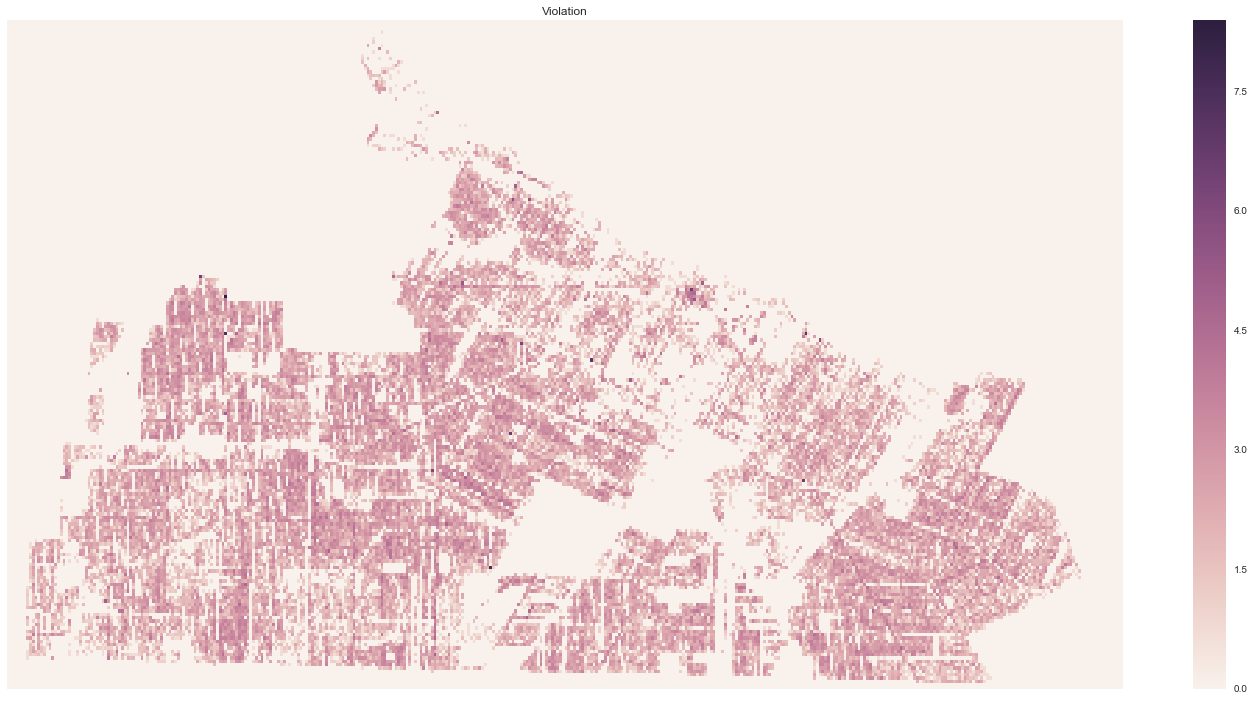

In [48]:
generateMap(map_v, 'Violation')

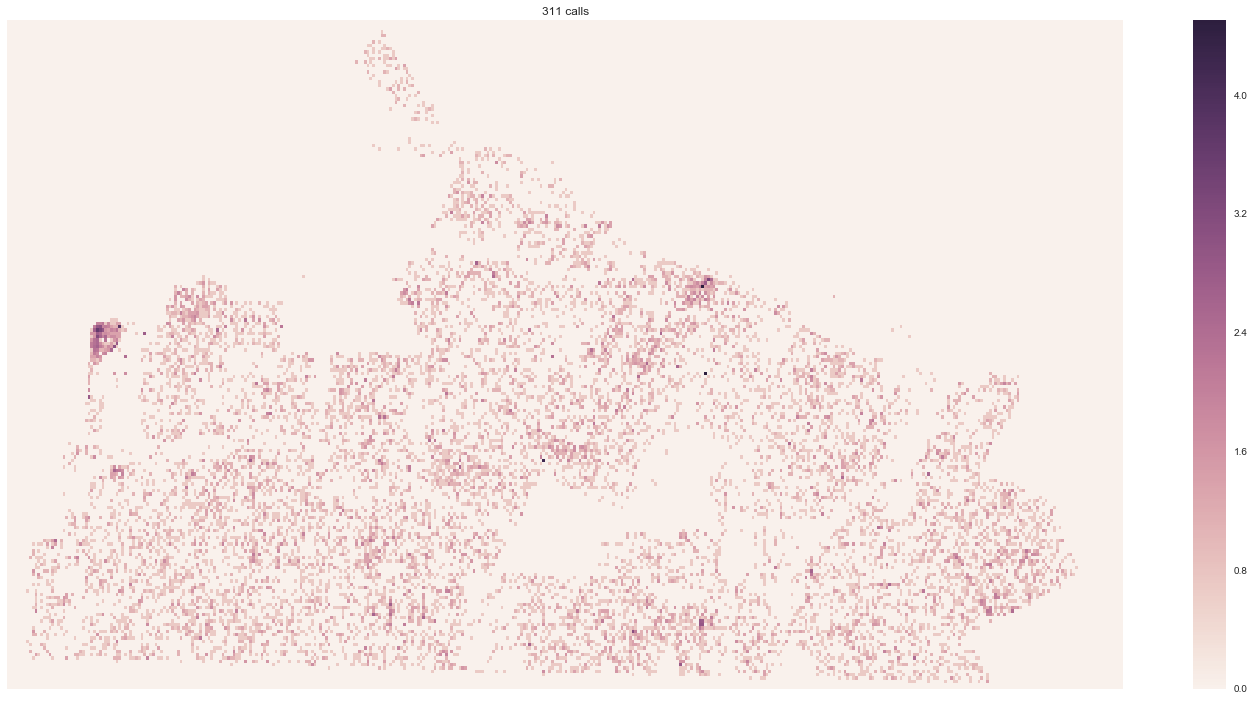

In [49]:
generateMap(map_t, '311 calls')

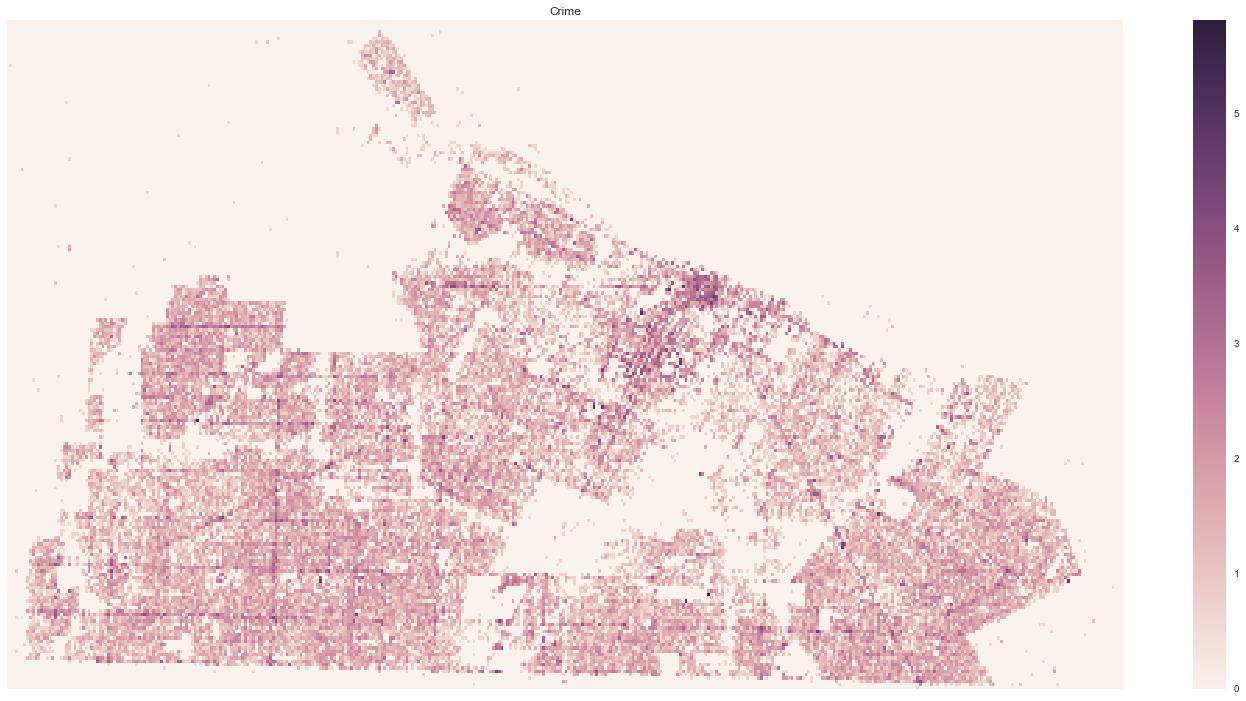

In [50]:
generateMap(map_c, title='Crime')

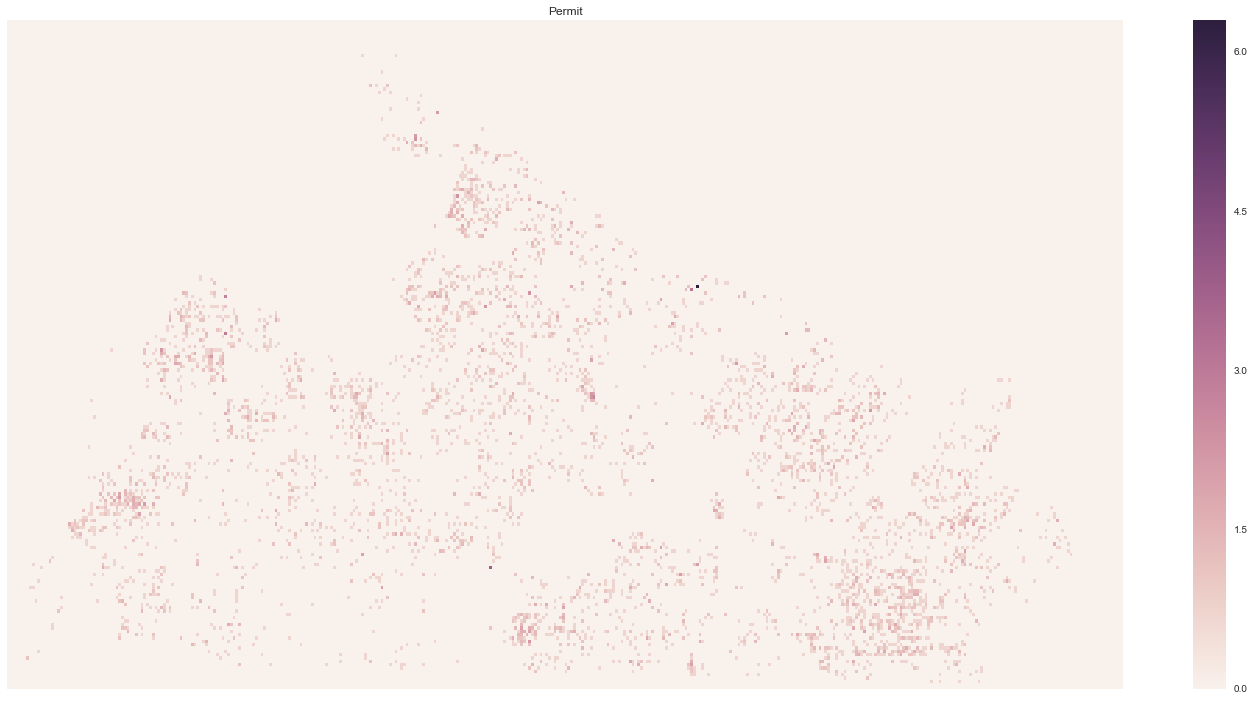

In [51]:
generateMap(map_p,'Permit')

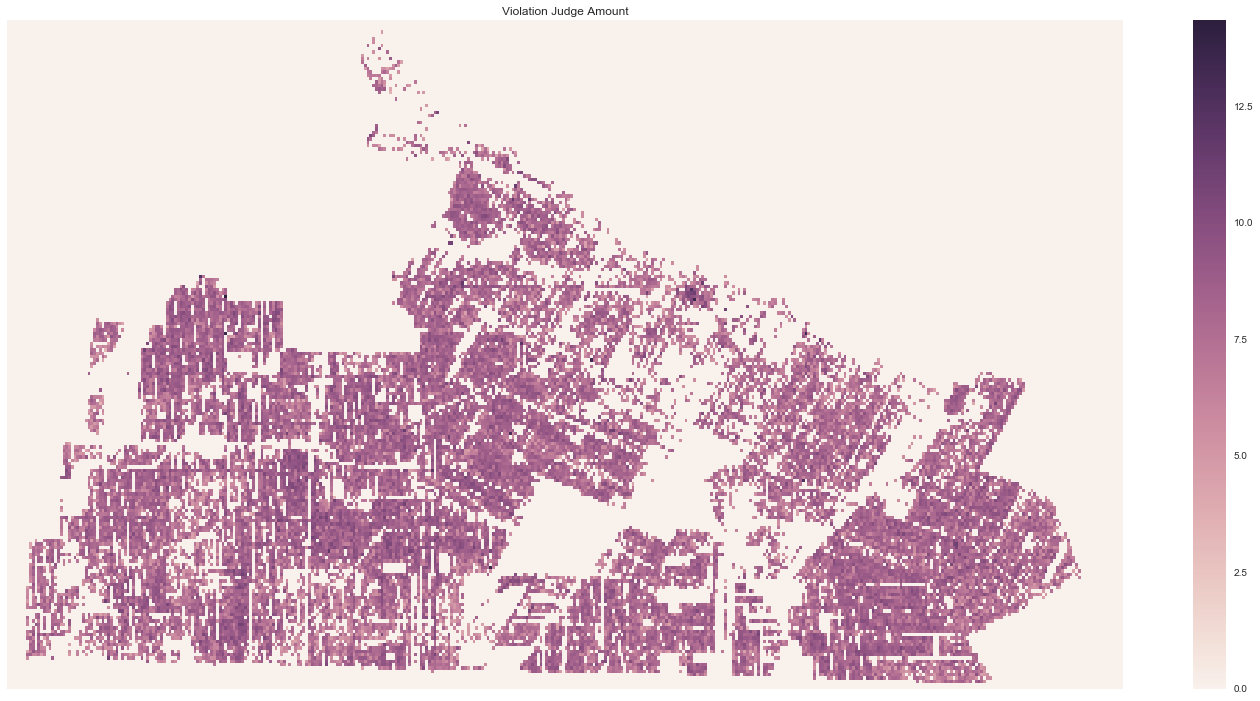

In [52]:
generateMap(map_vj, title='Violation Judge Amount')

In [54]:
(map_v>0).sum()

24215

In [55]:
(map_t>0).sum()

11343

In [56]:
(map_p>0).sum()

4128

In [57]:
(map_vj>0).sum()

24209

In [58]:
(map_c>0).sum()

26720